In [2]:
import pandas as pd

result_df = pd.read_csv("model1_finetune.csv")
result_df.head()

,Name,step,test_mse,valid_mse,epoch_loss,epoch,test,model_path,Notes,Created,...,freeze_disease_encoder,freeze_prot_encoder,lr,max_epoch,patience,prot_encoder_path,save_name,save_path_prefix,text_encoder_path,train_dir
0,eternal-butterfly-59,200000,0.0214,0.0190,2.786599,8,True,../save_model_ckp/model1_freeze_disease_encode...,20000,2022-06-11T11:37:16.000Z,...,False,False,0.00005,25,5,Rostlab/prot_bert,../save_model_ckp/fine_tune_20220611_113718_ls...,../save_model_ckp/,microsoft/BiomedNLP-PubMedBERT-base-uncased-ab...,../data/
1,radiant-wood-58,190000,0.0178,0.0154,2.624694,5,True,../save_model_ckp/model1_freeze_disease_encode...,19000,2022-06-11T10:44:13.000Z,...,False,False,0.00005,25,5,Rostlab/prot_bert,../save_model_ckp/fine_tune_20220611_104414_dt...,../save_model_ckp/,microsoft/BiomedNLP-PubMedBERT-base-uncased-ab...,../data/
2,lilac-cherry-57,180000,0.0180,0.0156,2.683366,7,True,../save_model_ckp/model1_freeze_disease_encode...,18000,2022-06-11T09:33:39.000Z,...,False,False,0.00005,25,5,Rostlab/prot_bert,../save_model_ckp/fine_tune_20220611_093340_nc...,../save_model_ckp/,microsoft/BiomedNLP-PubMedBERT-base-uncased-ab...,../data/
3,golden-silence-56,170000,0.0144,0.0129,2.139933,9,True,../save_model_ckp/model1_freeze_disease_encode...,17000,2022-06-11T08:05:37.000Z,...,False,False,0.00005,25,5,Rostlab/prot_bert,../save_model_ckp/fine_tune_20220611_080539_ja...,../save_model_ckp/,microsoft/BiomedNLP-PubMedBERT-base-uncased-ab...,../data/
4,silver-firebrand-55,160000,0.0173,0.0161,2.235403,10,True,../save_model_ckp/model1_freeze_disease_encode...,16000,2022-06-11T06:28:34.000Z,...,False,False,0.00005,25,5,Rostlab/prot_bert,../save_model_ckp/fine_tune_20220611_062836_py...,../save_model_ckp/,microsoft/BiomedNLP-PubMedBERT-base-uncased-ab...,../data/


In [3]:
result_df_no_freeze = result_df[result_df["test"] == True][
    result_df["model_path"].str.contains("freeze_prot")
]
result_df_no_freeze = result_df_no_freeze[["step", "test_mse"]]
result_df_no_freeze_avg = result_df_no_freeze["test_mse"].mean()
result_df_no_freeze["set"] = "no_freeze"
result_df_no_freeze.head()

,step,test_mse,set
20,200000,0.0197,no_freeze
21,190000,0.0193,no_freeze
22,180000,0.0196,no_freeze
23,170000,0.0193,no_freeze
24,160000,0.0194,no_freeze


In [4]:
result_df_freeze_disease = result_df[result_df["test"] == True][
    result_df["model_path"].str.contains("model1_freeze_disease")
]
result_df_freeze_disease = result_df_freeze_disease[["step", "test_mse"]]
result_df_freeze_disease["set"] = "freeze_disease"
result_df_freeze_disease_avg = result_df_freeze_disease["test_mse"].mean()
result_df_freeze_disease.head()

,step,test_mse,set
0,200000,0.0214,freeze_disease
1,190000,0.0178,freeze_disease
2,180000,0.0180,freeze_disease
3,170000,0.0144,freeze_disease
4,160000,0.0173,freeze_disease


In [5]:
plot_df = result_df_freeze_disease.append(result_df_no_freeze)

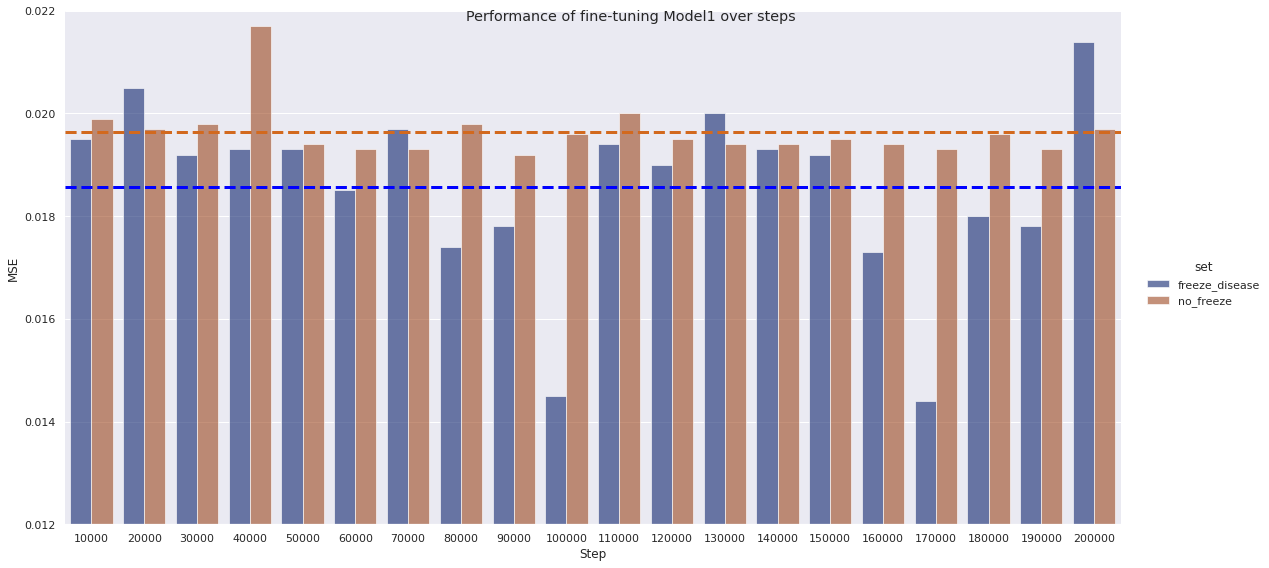

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set(style="darkgrid")    
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 21.7,8.27
palette = sns.color_palette("bright", 4)

g = sns.catplot(
    data=plot_df,
    kind="bar",
    x="step",
    y="test_mse",
    hue="set",
    ci="sd",
    palette="dark",
    height=8,
    aspect=2,
    alpha=0.6,
)
g.despine(left=True)
g.refline(y = result_df_freeze_disease_avg,
          color = "blue",
          lw = 3)
g.refline(y = result_df_no_freeze_avg,
          color = "chocolate",
          lw = 3)
g.set_axis_labels("Step", "MSE")
g.set(ylim=(0.012, 0.022))
g.fig.suptitle("Performance of fine-tuning Model1 over steps")
plt.show()